# Desafio Data Science - Semantix

##### Hipóteses

1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
4. O resultado da campanha anterior tem relevância na campanha atual?
5. Qual o fator determinante para que o banco exija um seguro de crédito?
6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

### Importação de bibliotecas

In [1]:
# Importando bibliotecas
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from matplotlib import style
from matplotlib.ticker import ScalarFormatter

from importlib import reload
style.use("ggplot")

%matplotlib inline

import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm

In [5]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Configuração de exibição em tela dos dados

In [6]:
#configurando apresentação em tela
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Importação dos dados

In [7]:
basebank = pd.read_csv('../data/bank-full.csv', sep=';', encoding='ISO-8859-1')

In [8]:
basebank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
basebank.shape

(45211, 17)

### Analise descritiva

In [10]:
# Todas as colunas da base
for col in basebank.columns:
    print ('%s' %(col))

age
job
marital
education
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
y


In [11]:
basebank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [12]:
basebank.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

Analise de nulos na base



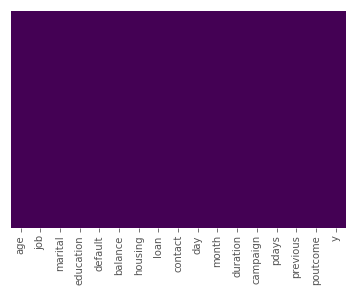

In [13]:
# visualizar nulos na base
print('Analise de nulos na base')
print('')

fig, ax = plt.subplots()
sns.heatmap(basebank.isnull()
            ,yticklabels=False
            ,cbar=False
            ,cmap='viridis'
           )
plt.savefig('Nulls')
plt.show()
plt.close()

In [14]:
basebank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000
mean,40.936,1362.272,15.806,258.163,2.764,40.198,0.580
std,10.619,3044.766,8.322,257.528,3.098,100.129,2.303
min,18.000,-8019.000,1.000,0.000,1.000,-1.000,0.000
25%,33.000,72.000,8.000,103.000,1.000,-1.000,0.000
50%,39.000,448.000,16.000,180.000,2.000,-1.000,0.000
75%,48.000,1428.000,21.000,319.000,3.000,-1.000,0.000
max,95.000,102127.000,31.000,4918.000,63.000,871.000,275.000


In [15]:
basebank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [16]:
# alterar dados true/false para numericos 1/0
basebank.default.replace(to_replace=['yes','no'], value=[1,0], inplace=True)
basebank.housing.replace(to_replace=['yes','no'], value=[1,0], inplace=True)
basebank.loan.replace(to_replace=['yes','no'], value=[1,0], inplace=True)
basebank.y.replace(to_replace=['yes','no'], value=[1,0], inplace=True)

In [17]:
print('Volumetria geral da base')
print('')

totalclientes = basebank.age.count()
idademedia = basebank.age.mean()
maisvelho = basebank.age.max()
maisnovo = basebank.age.min()
totalinad = basebank.default.sum()
totalemprestcasa = basebank.housing.sum()
totalemprestpess = basebank.loan.sum()
totalbalmedanu = basebank.balance.sum()
medbalmedanu = basebank.balance.mean()
medianobalmedanu = basebank.balance.median()
maxbalmedanu = basebank.balance.max()
minbalmedanu = basebank.balance.min()
profmaxfreq = str((basebank.groupby(['job'])['age'].count()).sort_values(ascending=False).index[0])
percprofmaxfreq = ((basebank.groupby(['job'])['age'].count()).sort_values(ascending=False).head(1)[0]/totalclientes)*100
edumaxfreq = str((basebank.groupby(['education'])['age'].count()).sort_values(ascending=False).index[0])
percedumaxfreq = ((basebank.groupby(['education'])['age'].count()).sort_values(ascending=False).head(1)[0]/totalclientes)*100
estcivelmaxfreq = str((basebank.groupby(['marital'])['age'].count()).sort_values(ascending=False).index[0])
percestcivelmaxfreq = ((basebank.groupby(['marital'])['age'].count()).sort_values(ascending=False).head(1)[0]/totalclientes)*100

totalcontatos = basebank.campaign.sum()
totalsucessatu = basebank.y.sum()
totalsucessant = basebank[(basebank.poutcome == 'success')].poutcome.count()

duracaomedia = basebank.duration.mean()
duracaomax = basebank.duration.max()
duracaomin = basebank.duration.min()
duracaomaxsuc = basebank[(basebank.y == 1)].duration.max()
duracaominsuc = basebank[(basebank.y == 1) & (basebank.duration > 20)].duration.min()

print('Total de clientes: {0:,}'.format(totalclientes))
print('')
print('Idade média dos clientes:    {0:,.2f}'.format(idademedia))
print('Idade do cliente mais velho: {0:,}'.format(maisvelho))
print('Idade do cliente mais novo:  {0:,}'.format(maisnovo))
print('')
print('Total de inadimplentes: {0:,}'.format(totalinad))
print('')
print('Total de empréstimos imobiliários: {0:,}'.format(totalemprestcasa))
print('Total de empréstimos pessoal:      {0:,}'.format(totalemprestpess))
print('')
print('Balanço médio - total anual:           {0:,}'.format(totalbalmedanu))
print('Balanço médio - média e mediana anual: {0:,.2f} e {1:,.2f}'.format(medbalmedanu,medianobalmedanu))
print('Balanço médio - maior do ano:          {0:,}'.format(maxbalmedanu))
print('Balanço médio - menor do ano:          {0:,}'.format(minbalmedanu))
print('')
print('Profissão mais frequente: {0:}, representando {1:.1f}% da base'.format(profmaxfreq,percprofmaxfreq))
print('')
print('Nível educacional mais frequente: {0:}, representando {1:.1f}% da base'.format(edumaxfreq,percedumaxfreq))
print('')
print('Estado civil mais frequente: {0:}, representando {1:.1f}% da base'.format(estcivelmaxfreq,percestcivelmaxfreq))
print('')
print('Total de contatos na campanha:         {0:,}'.format(totalcontatos))
print('Total de sucesso na campanha:          {0:,}'.format(totalsucessatu))
print('Total de sucesso na campanha anterior: {0:,}'.format(totalsucessant))
print('')
print('Duração média da última ligação (em segundos): {0:,.0f}'.format(duracaomedia))
print('Maior tempo de ligação (em segundos): {0:,}'.format(duracaomax))
print('Menor tempo de ligação (em segundos): {0:,}'.format(duracaomin))
print('Maior tempo de ligação de sucesso (em segundos): {0:,}'.format(duracaomaxsuc))
print('Menor tempo de ligação de sucesso (em segundos): {0:,}'.format(duracaominsuc))

Volumetria geral da base

Total de clientes: 45,211

Idade média dos clientes:    40.94
Idade do cliente mais velho: 95
Idade do cliente mais novo:  18

Total de inadimplentes: 815

Total de empréstimos imobiliários: 25,130
Total de empréstimos pessoal:      7,244

Balanço médio - total anual:           61,589,682
Balanço médio - média e mediana anual: 1,362.27 e 448.00
Balanço médio - maior do ano:          102,127
Balanço médio - menor do ano:          -8,019

Profissão mais frequente: blue-collar, representando 21.5% da base

Nível educacional mais frequente: secondary, representando 51.3% da base

Estado civil mais frequente: married, representando 60.2% da base

Total de contatos na campanha:         124,956
Total de sucesso na campanha:          5,289
Total de sucesso na campanha anterior: 1,511

Duração média da última ligação (em segundos): 258
Maior tempo de ligação (em segundos): 4,918
Menor tempo de ligação (em segundos): 0
Maior tempo de ligação de sucesso (em segundos): 3,

### hipótese/pergunta 1
### Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

In [18]:
grouped1 = basebank.groupby(['job']).agg({'age': 'count', 'housing' : sum, 'loan' : sum})
grouped1.rename(columns={"age": "qtd"}, inplace=True)
grouped1['total'] = grouped1.housing + grouped1.loan
grouped1['perc'] = grouped1.total/grouped1.qtd
grouped1.sort_values('perc', ascending=0, inplace=True)
grouped1.reset_index(inplace=True)
grouped1

,job,qtd,housing,loan,total,perc
0,blue-collar,9732,7048,1684,8732,0.897
1,services,4154,2766,836,3602,0.867
2,entrepreneur,1487,869,356,1225,0.824
3,admin.,5171,3182,991,4173,0.807
4,technician,7597,4115,1309,5424,0.714
5,self-employed,1579,765,229,994,0.630
6,management,9458,4678,1253,5931,0.627
7,unemployed,1303,543,109,652,0.500
8,housemaid,1240,398,152,550,0.444
9,retired,2264,491,309,800,0.353


In [19]:
dfb = grouped1.sort_values('perc', ascending=1)

fig, ax = plt.subplots(figsize=(17,11), dpi=600)
plt.title("Top Empréstimos", fontsize=16, y=1.01)
plt.grid(b=True, which='major', axis='both', alpha=0.5, zorder=0)

#ax.barh(dfb.job, dfb.perc, zorder=3)
ax.barh(np.arange(dfb.job.count()), dfb.perc, zorder=3)
ax.set_ylabel("Profissão", fontsize=12, x=1.11)
ax.set_yticks(np.arange(dfb.job.count()))
ax.set_yticklabels(dfb.job, fontsize=12)
ax.set_xlabel("Porcentagem de empréstimos totais", fontsize=12, x=1.11)
ax.set_xlim(xmax=1)

plt.show()
plt.close()

In [20]:
df = grouped1.sort_values('total', ascending=0)

df['cumulative_sum'] = df.total.cumsum()
df['cumulative_perc'] = 100*df.cumulative_sum/df.total.sum()
df['demarcation'] = 80

fig, ax = plt.subplots(figsize=(17,11), dpi=600)
plt.title("Pareto - Empréstimos por profissão", fontsize=16, y=1.01)
plt.grid(b=True, which='major', axis='both', alpha=0.5, zorder=0)

ax.bar(np.arange(df.job.count()),df.total, color='cornflowerblue', zorder=3)
ax.set_ylabel("Quantidade de empréstimos", fontsize=12, x=1.11)
ax.set_xticks(np.arange(df.job.count()))
ax.set_xticklabels(df.job, fontsize=12, rotation=90)
ax.set_ylim(bottom=0,top=df.total.max()*1.01)
ax.minorticks_on()

ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax1.plot(np.arange(df.job.count()),df.cumulative_perc,c='darkgoldenrod',lw=3)
ax1.set_ylabel('Percentual Acumulado')
ax1.set_ylim(bottom=0, top=100*1.01)
ax1.hlines(y=80, xmin=0, xmax=df.job.count(), linewidth=1.5, color='gray', linestyles='dashed')

plt.savefig('Pareto')
plt.show()
plt.close()

In [21]:
print('Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?')
print('')

profissao = str(grouped1.job.head(1)[0])
porcentagem = float((grouped1.perc.head(1))*100)
porchousing = float((grouped1.housing.head(1)/grouped1.total.head(1))*100)

print('Profissão: {0:10}, com uma porcentagem de empréstimos total de {1:.1f}%, sendo a maioria empréstimos para casa ({2:.1f}% entre os 2 tipos de empréstimos considerados).'.format(profissao,porcentagem,porchousing))
print('')
print('Vale apontar que 80% dos empréstimos estão concentrados em 4 profissões.')

Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

Profissão: blue-collar, com uma porcentagem de empréstimos total de 89.7%, sendo a maioria empréstimos para casa (80.7% entre os 2 tipos de empréstimos considerados).

Vale apontar que 80% dos empréstimos estão concentrados em 4 profissões.


### hipótese/pergunta 2
### Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

In [22]:
basebank.groupby(['y'])['campaign'].sum()

y
0    113632
1     11324
Name: campaign, dtype: int64

In [23]:
basebank.campaign.describe()

count   45211.000
mean        2.764
std         3.098
min         1.000
25%         1.000
50%         2.000
75%         3.000
max        63.000
Name: campaign, dtype: float64

In [24]:
basebank[(basebank.y == 1)].campaign.describe()

count   5289.000
mean       2.141
std        1.922
min        1.000
25%        1.000
50%        2.000
75%        3.000
max       32.000
Name: campaign, dtype: float64

In [25]:
basebank[(basebank.y == 0)].campaign.describe()

count   39922.000
mean        2.846
std         3.213
min         1.000
25%         1.000
50%         2.000
75%         3.000
max        63.000
Name: campaign, dtype: float64

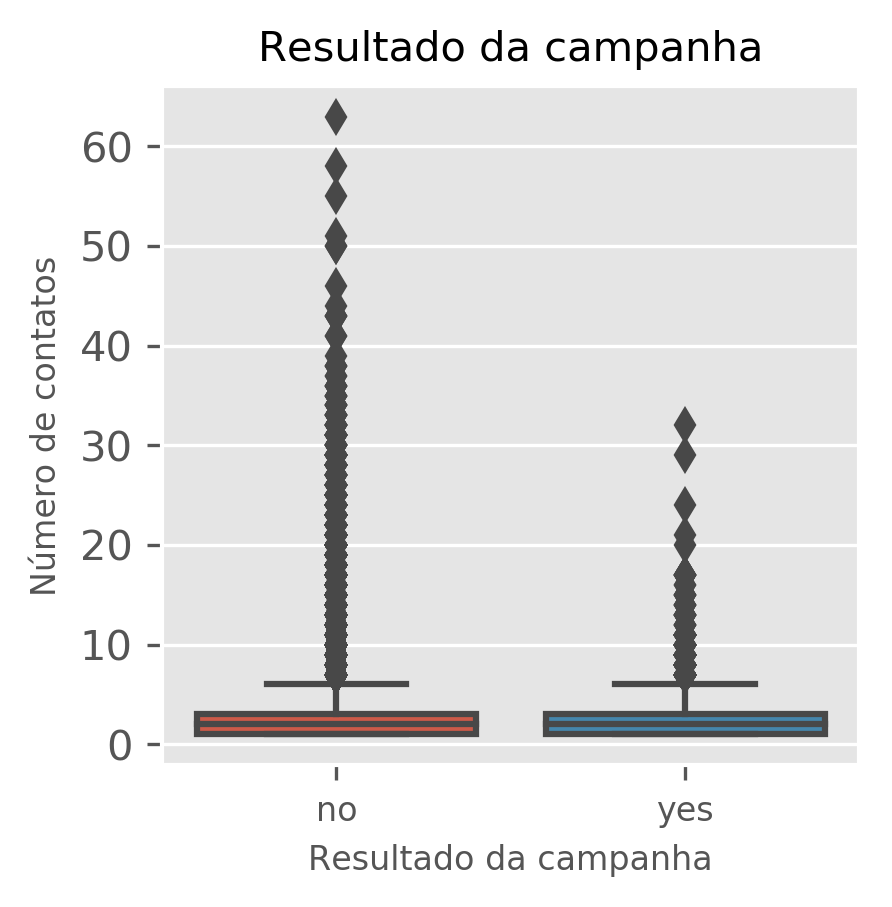

In [26]:
fig, ax = plt.subplots(figsize=(3,3),dpi=300)
sns.boxplot('y', 'campaign', data=basebank)
plt.xticks(np.arange(2), ('no', 'yes'), fontsize = 8)
plt.title("Resultado da campanha", fontsize=10)
plt.ylabel("Número de contatos", fontsize=8, x=1.07)
plt.xlabel("Resultado da campanha", fontsize=8, y=1.07)
plt.show()
plt.close()

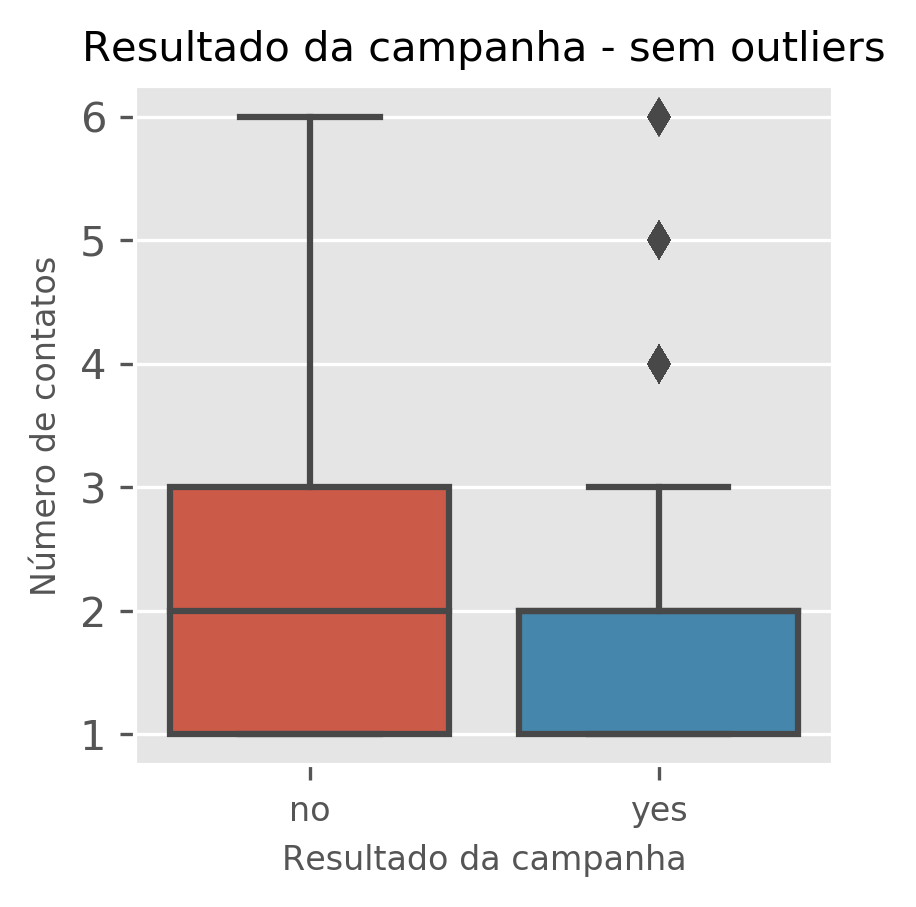

In [27]:
#removendo outliers
plotbank2 = basebank[(basebank.campaign < 7)]

fig, ax = plt.subplots(figsize=(3,3),dpi=300)
sns.boxplot('y', 'campaign', data=plotbank2)
plt.xticks(np.arange(2), ('no', 'yes'), fontsize = 8)
plt.title("Resultado da campanha - sem outliers", fontsize=10)
plt.ylabel("Número de contatos", fontsize=8, x=1.07)
plt.xlabel("Resultado da campanha", fontsize=8, y=1.07)
plt.show()
plt.close()

Histograma de ligações para campanha


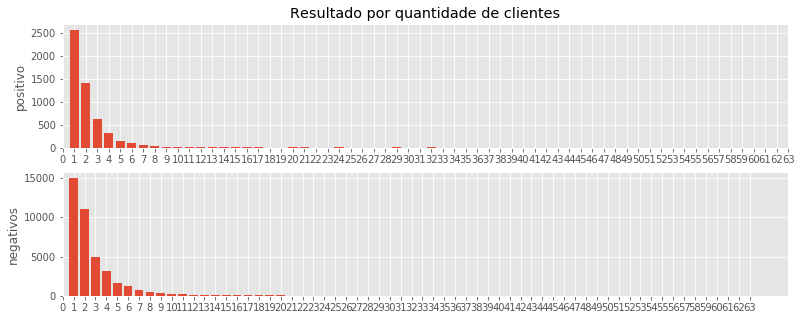

In [28]:
grouped2y = basebank[(basebank.y == 1)].groupby(['campaign'])['y'].count().reset_index(name='qtd')
grouped2n = basebank[(basebank.y == 0)].groupby(['campaign'])['y'].count().reset_index(name='qtd')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13,5))

print('Histograma de ligações para campanha')

ax1.bar(grouped2y.campaign, grouped2y.qtd, )
ax2.bar(grouped2n.campaign, grouped2n.qtd)

ax1.set(title='Resultado por quantidade de clientes', ylabel='positivo')
ax1.set_xticks(np.arange(0,basebank.campaign.max()*1.01,1))
ax1.set_xlim(left=0)

ax2.set(ylabel='negativos')
ax2.set_xticks(np.arange(0,basebank.campaign.max()*1.01,1))
ax2.set_xlim(left=0)

plt.show()
plt.close()

In [29]:
print('Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?')
print('')

percadocao = (basebank[(basebank.y == 1)].y.count()/basebank.y.count())*100
medligcliente = int(basebank[(basebank.y == 1)].campaign.mean())
campcliy = (basebank[((basebank.y == 1) & (basebank.campaign <= 3))].y.count()/basebank[(basebank.y == 1)].y.count())*100

print('Apenas {0:.1f}% dos contatados aceitaram a proposta.'.format(percadocao))
print('Para aceitação foi preciso {0:,} ligações por cliente, em média.'.format(medligcliente))

Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

Apenas 11.7% dos contatados aceitaram a proposta.
Para aceitação foi preciso 2 ligações por cliente, em média.


### hipótese/pergunta 3
### Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

In [30]:
varselect = ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']
bbankmodel = basebank[varselect]
bbankmodel

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
5,35,0,231,1,0,5,139,1,-1,0,0
6,28,0,447,1,1,5,217,1,-1,0,0
7,42,1,2,1,0,5,380,1,-1,0,0
8,58,0,121,1,0,5,50,1,-1,0,0
9,43,0,593,1,0,5,55,1,-1,0,0


In [31]:
# Cria novo DataFrame para as colunas categoricas
dum_job = pd.get_dummies(basebank['job'])
dum_marital = pd.get_dummies(basebank['marital'])
dum_education = pd.get_dummies(basebank['education'])
dum_contact = pd.get_dummies(basebank['contact'])
dum_poutcome = pd.get_dummies(basebank['poutcome'])

In [32]:
# deletando uma coluna para cada coluna categorica
dum_job.drop(['unknown'], axis=1, inplace=True)
dum_marital.drop(['divorced'], axis=1, inplace=True)
dum_education.drop(['unknown'], axis=1, inplace=True)
dum_contact.drop(['unknown'], axis=1, inplace=True)
dum_poutcome.drop(['failure'], axis=1, inplace=True)

In [33]:
bbankmodel = pd.concat([bbankmodel, dum_job, dum_marital, dum_education, dum_contact, dum_poutcome], axis=1)

In [34]:
bbankmodel.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,primary,secondary,tertiary,cellular,telephone,other,success,unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [35]:
# Todas as colunas da base
for col in bbankmodel.columns:
    print ('%s' %(col))

age
default
balance
housing
loan
day
duration
campaign
pdays
previous
y
admin.
blue-collar
entrepreneur
housemaid
management
retired
self-employed
services
student
technician
unemployed
married
single
primary
secondary
tertiary
cellular
telephone
other
success
unknown


In [36]:
# Variáveis selecionadas
variaveis = ['age'
             #,'default'
             #,'balance'
             ,'housing'
             #,'loan'
             #,'day'
             ,'duration'
             #,'campaign'
             ,'pdays'
             ,'previous'
             #,'y'
             #,'admin.'
             #,'blue-collar'
             #,'entrepreneur'
             #,'housemaid'
             #,'management'
             #,'retired'
             #,'self-employed'
             #,'services'
             #,'student'
             #,'technician'
             #,'unemployed'
             #,'married'
             #,'single'
             #,'primary'
             #,'secondary'
             #,'tertiary'
             ,'cellular'
             #,'telephone'
             ,'success'
            ]

In [37]:
X = bbankmodel[variaveis].values

# Variável a ser prevista
y = bbankmodel['y'].values

#Criando vetores de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# quais são os shapes de cada parte
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31647, 7) (13564, 7) (31647,) (13564,)


#### Random Forest

In [38]:
# Treino do modelo de predição
modelorf = RandomForestClassifier(n_estimators=100
                                ,criterion='entropy'
                                ,max_depth=1
                                ,min_samples_split=30
                                ,min_samples_leaf=300
                                ,max_features='sqrt'
                                ,bootstrap=True
                                ,oob_score=True
                                ,n_jobs=-1
                                ,random_state=42
                                ,warm_start=True)

modelorf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=300, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=True)

Ranking de Variaveis:
1. success (0.300000)
2. duration (0.240000)
3. pdays (0.150000)
4. previous (0.140000)
5. cellular (0.100000)
6. housing (0.050000)
7. age (0.020000)


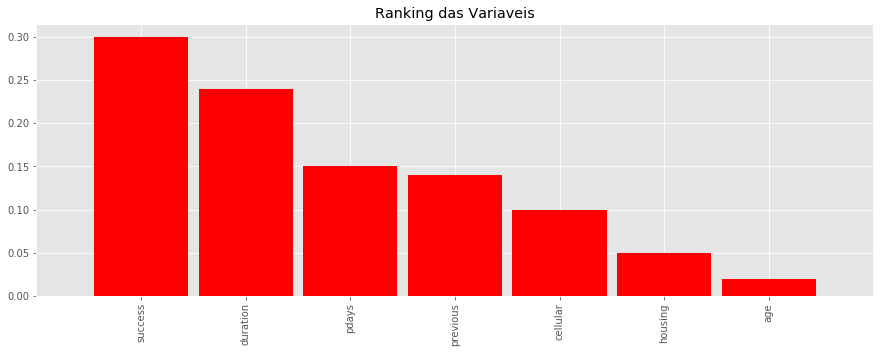

In [39]:
# Grafico de Variaveis da Floresta Aleatória
importances = modelorf.feature_importances_
s = pd.Series(importances, index=variaveis)

std = np.std([tree.feature_importances_ for tree in modelorf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
s=s.sort_values(ascending=False)

# Print the feature ranking
print("Ranking de Variaveis:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, s.index[f], importances[indices[f]]))

importvarrf = importances[indices[0]]

# Plot the feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Ranking das Variaveis")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center",width=0.9)
plt.xticks(range(X.shape[1]), s.index)
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.close()

In [40]:
# Verificando os dados de treino
rf_predict_train = modelorf.predict(X_train)
print("Train Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

# Verificando nos dados de teste
rf_predict_test = modelorf.predict(X_test)
print("Test Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Train Accuracy: 0.8834
Test Accuracy: 0.8822


In [62]:
print(metrics.classification_report(y_test, rf_predict_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.00      0.00      0.00      1598

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



In [63]:
acuraciarf = (metrics.accuracy_score(y_test, rf_predict_test))*100

#### Logistic Regression

In [64]:
# Treino do modelo de predição
modelolr = LogisticRegression(penalty='l2'
                              ,dual=False
                              ,tol=0.0001
                              ,C=1.0
                              ,fit_intercept=True
                              ,intercept_scaling=1
                              ,class_weight='balanced'
                              ,random_state=42
                              ,solver='lbfgs'
                              ,max_iter=100
                              ,multi_class='multinomial'
                              ,verbose=0
                              ,warm_start=False
                              ,n_jobs=-1
                             )

modelolr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=-1, penalty='l2',
          random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [65]:
# Verificando os dados de treino
lr_predict_train = modelolr.predict(X_train)
print("Accuracy Train: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

# Verificando nos dados de teste
lr_predict_test = modelolr.predict(X_test)
print("Accuracy Test : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print()

Accuracy Train: 0.8297
Accuracy Test : 0.8294



In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, lr_predict_test))
print("Precision:",metrics.precision_score(y_test, lr_predict_test, pos_label=1))
print("Recall:",metrics.recall_score(y_test, lr_predict_test, pos_label=1))

Accuracy: 0.8294013565319964
Precision: 0.38451612903225807
Recall: 0.7459324155193993


[0.03479587 0.03482165 0.03498261 ... 0.99999997 0.99999998 1.        ]


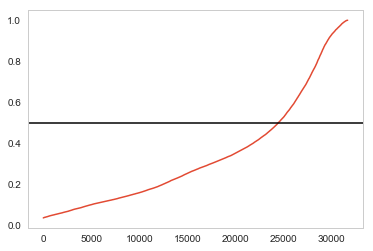

In [67]:
# Analise do resultado de treino
scores_train = modelolr.predict_proba(X_train)
sort_1 = np.sort(scores_train[:,1]) #[::-1]

print(sort_1)

plt.plot(sort_1)
plt.axhline(y=0.5, color='black', linestyle='-')

plt.show()
plt.close()

In [68]:
print(metrics.classification_report(y_test, lr_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90     11966
           1       0.38      0.75      0.51      1598

   micro avg       0.83      0.83      0.83     13564
   macro avg       0.67      0.79      0.70     13564
weighted avg       0.89      0.83      0.85     13564



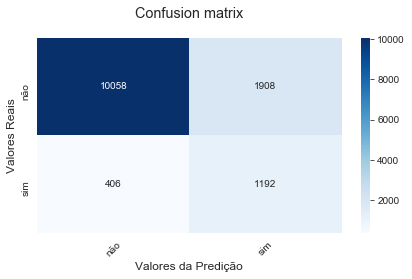

In [69]:
class_names = ['não','sim']

sns.heatmap(metrics.confusion_matrix(y_test, lr_predict_test)
            ,annot=True
            ,fmt ='d'
            ,cmap=plt.cm.Blues #"YlGnBu"
            ,xticklabels=class_names
            ,yticklabels=class_names
           )

plt.xticks(rotation=45)

plt.title('Confusion matrix', y=1.07)
plt.ylabel('Valores Reais', x=0.07)
plt.xlabel('Valores da Predição', y=0.07)
plt.tight_layout()

plt.show()
plt.close()

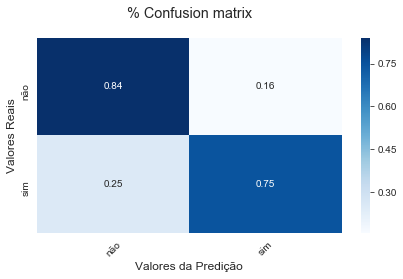

In [70]:
class_names = ['não','sim']

cm = metrics.confusion_matrix(y_test, lr_predict_test)
cmp = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmp
            ,annot=True
            ,fmt ='.2f'
            ,cmap=plt.cm.Blues #"YlGnBu"
            ,xticklabels=class_names
            ,yticklabels=class_names
           )

plt.xticks(rotation=45)

plt.title('% Confusion matrix', y=1.07)
plt.ylabel('Valores Reais', x=0.07)
plt.xlabel('Valores da Predição', y=0.07)
plt.tight_layout()

plt.show()
plt.close()

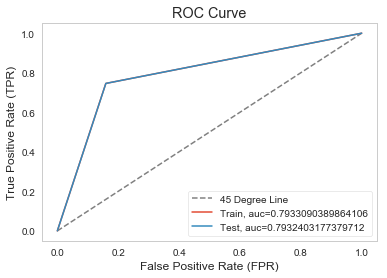

In [71]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(0).clf()

plt.plot([0,1], [0,1], color='grey', ls = '--', label='45 Degree Line')

fpr, tpr, thresh = metrics.roc_curve(y_train, lr_predict_train, pos_label=1)
auc = metrics.roc_auc_score(y_train, lr_predict_train)
plt.plot(fpr,tpr,label="Train, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, lr_predict_test, pos_label=1)
auc = metrics.roc_auc_score(y_test, lr_predict_test)
plt.plot(fpr,tpr,label="Test, auc="+str(auc))

plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')
plt.show()
plt.close()

### Linear Regression

In [72]:
# Aplicação de regressão linear para predição de número de ligações

In [73]:
# Variáveis selecionadas
variaveis = ['age'
             #,'default'
             #,'balance'
             ,'housing'
             #,'loan'
             ,'day'
             ,'duration'
             #,'campaign'
             ,'pdays'
             #,'previous'
             ,'y'
             #,'admin.'
             #,'blue-collar'
             #,'entrepreneur'
             #,'housemaid'
             #,'management'
             #,'retired'
             #,'self-employed'
             #,'services'
             #,'student'
             #,'technician'
             #,'unemployed'
             #,'married'
             #,'single'
             #,'primary'
             #,'secondary'
             #,'tertiary'
             ,'cellular'
             #,'telephone'
             ,'success'
            ]

In [74]:
X = bbankmodel[variaveis].values

# Variável a ser prevista
y = bbankmodel['campaign'].values

#Criando vetores de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# quais são os shapes de cada parte
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22605, 8) (22606, 8) (22605,) (22606,)


In [75]:
modelorlinear = LinearRegression(fit_intercept=True
                                 ,normalize=True
                                 ,copy_X=True
                                 ,n_jobs=-1
                                )

modelorlinear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [76]:
# R^2 desse fit
modelorlinear.score(X_test, y_test)

0.04010100308985942

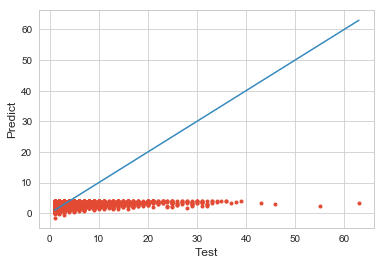

In [77]:
y_pred = modelorlinear.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(y_test.min(), y_test.max(), 100)
y = x
plt.plot(x, y)

plt.xlabel("Test")
plt.ylabel("Predict")
plt.grid(b=True)

plt.show()
plt.close()

In [78]:
print('Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?')
print('')              
print('Pela distribuição podemos notar que o comportamento dos clientes quanto a aceitação não é afetado pela quantidade de ligações,')
print('e que uma boa parte dos clientes que aceitaram, o fizeram com no máximo 3 ligações ({0:.1f}%).'.format(campcliy))
print('')
print('Os modelos preditivos empregados não apresentam boa acurácia para determinar o número de ligações,')
print('mas é possível identificar melhor o público alvo para a campanha, com uma acurácia de {0:.1f}%'.format(acuraciarf))
print('')
print('Portanto, pelas analises númericas realizadas sobre os casos de sucesso, recomendo:')
print('     Número médio de ligações a serem feitas:  3')
print('     Número máximo de ligações a serem feitas: 6')
print('     Uso de um modelo tipo Random Forest para determinar o público alvo.')

Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

Pela distribuição podemos notar que o comportamento dos clientes quanto a aceitação não é afetado pela quantidade de ligações,
e que uma boa parte dos clientes que aceitaram, o fizeram com no máximo 3 ligações (86.6%).

Os modelos preditivos empregados não apresentam boa acurácia para determinar o número de ligações,
mas é possível identificar melhor o público alvo para a campanha, com uma acurácia de 88.2%

Portanto, pelas analises númericas realizadas sobre os casos de sucesso, recomendo:
     Número médio de ligações a serem feitas:  3
     Número máximo de ligações a serem feitas: 6
     Uso de um modelo tipo Random Forest para determinar o público alvo.


### hipótese/pergunta 4
### O resultado da campanha anterior tem relevância na campanha atual?

In [79]:
grouped4 = basebank.pivot_table(values='age', index='poutcome', columns='y', aggfunc='count')
grouped4.sort_values(by=1, ascending=0, inplace=True)
grouped4.reset_index(inplace=True)
grouped4

y,poutcome,0,1
0,unknown,33573,3386
1,success,533,978
2,failure,4283,618
3,other,1533,307


In [80]:
# transformar resultados da campanhas anterior em variáveis dummys e teste de correlação matemática
basebank4 = basebank['y']
dum_poutcome = pd.get_dummies(basebank['poutcome'])
dum_poutcome.columns = ['unknown','success','failure','other']
basebank4 = pd.concat([basebank4, dum_poutcome], axis=1)

In [81]:
basebank4.corr()

,y,unknown,success,failure,other
y,1.000,0.010,0.032,0.307,-0.167
unknown,0.010,1.000,-0.072,-0.065,-0.738
success,0.032,-0.072,1.000,-0.038,-0.436
failure,0.307,-0.065,-0.038,1.000,-0.394
other,-0.167,-0.738,-0.436,-0.394,1.000


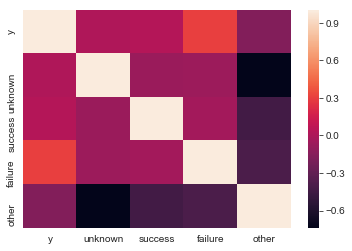

In [82]:
fig, ax = plt.subplots()
sns.heatmap(basebank4.corr())
plt.grid(b=True, which='both', axis='both')
plt.show()
plt.close()

In [83]:
grouped4.columns = ['poutcome','no','yes']
grouped4['totcli'] = grouped4.no + grouped4.yes
grouped4['percyes'] = grouped4.yes/grouped4.totcli
grouped4['percno'] = grouped4.no/grouped4.totcli
grouped4['percyesno'] = grouped4.yes/grouped4.no
grouped4['percnoyes'] = grouped4.no/grouped4.yes
grouped4

,poutcome,no,yes,totcli,percyes,percno,percyesno,percnoyes
0,unknown,33573,3386,36959,0.092,0.908,0.101,9.915
1,success,533,978,1511,0.647,0.353,1.835,0.545
2,failure,4283,618,4901,0.126,0.874,0.144,6.930
3,other,1533,307,1840,0.167,0.833,0.200,4.993


In [84]:
# assumir que tudo que não é sucesso é falha para uma analise de odds
grouped42 = basebank
grouped42.poutcome.replace({'unknown':'failure', 'other':'failure'}, inplace=True)
grouped42 = grouped42.pivot_table(values='age', index='poutcome', columns='y', aggfunc='count')
grouped42.columns = ['no','yes']
grouped42.reset_index(drop=True, inplace=True)
grouped42

,no,yes
0,39389,4311
1,533,978


In [85]:
table = grouped42[['no','yes']].values
print(table)

[[39389  4311]
 [  533   978]]


In [86]:
oddsratio, pvalue = stats.fisher_exact(table)
print("OddsR:   ", oddsratio)
print("p-Value: ", pvalue)
print('')

chi2, p, dof, ex = stats.chi2_contingency(table, correction=True)
# The test statistic
print("chi2:    ", chi2)
# The p-value of the test
print("p:       ", p) 
# Degrees of freedom
print("dof:     ", dof)
print('')

# The expected frequencies, based on the marginal sums of the table
print("expected:", ex)

OddsR:    16.765193799360507
p-Value:  0.0

chi2:     4249.905233089683
p:        0.0
dof:      1

expected: [[38587.76403972  5112.23596028]
 [ 1334.23596028   176.76403972]]


In [87]:
table1 = sm.stats.Table2x2(table)
table1.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,16.765,,15.017,18.717,0.000
Log odds ratio,2.819,0.056,2.709,2.929,0.000
Risk ratio,2.555,,2.386,2.736,0.000
Log risk ratio,0.938,0.035,0.870,1.007,0.000


In [88]:
print('O resultado da campanha anterior tem relevância na campanha atual?')
print('')

print('Com base na correlação estatistica das variáveis e na analise de Odds e do R² (considerando tudo que não é sucesso como falha),')
print('o resultado da campanha anterior não parece influenciar os resultados atuais.')
print('Porém, ao utilizarmos modelos de predição, o sucesso de campanha anterior é variável de alta influência na predição.')
print('')
print('Odds: {0:.2f}'.format(oddsratio))
print('R2:   {0:.2f}'.format(chi2))
print('Relevância da variável sucesso na campanha anterior no modelo: {0:.1f}%'.format(importvarrf))

O resultado da campanha anterior tem relevância na campanha atual?

Com base na correlação estatistica das variáveis e na analise de Odds e do R² (considerando tudo que não é sucesso como falha),
o resultado da campanha anterior não parece influenciar os resultados atuais.
Porém, ao utilizarmos modelos de predição, o sucesso de campanha anterior é variável de alta influência na predição.

Odds: 16.77
R2:   4249.91
Relevância da variável sucesso na campanha anterior no modelo: 0.3%


### hipótese/pergunta 5
### Qual o fator determinante para que o banco exija um seguro de crédito?

In [89]:
basebank5 = basebank[['age','job','education','default','balance','housing','loan']]
basebank5

,age,job,education,default,balance,housing,loan
0,58,management,tertiary,0,2143,1,0
1,44,technician,secondary,0,29,1,0
2,33,entrepreneur,secondary,0,2,1,1
3,47,blue-collar,unknown,0,1506,1,0
4,33,unknown,unknown,0,1,0,0
5,35,management,tertiary,0,231,1,0
6,28,management,tertiary,0,447,1,1
7,42,entrepreneur,tertiary,1,2,1,0
8,58,retired,primary,0,121,1,0
9,43,technician,secondary,0,593,1,0


In [90]:
basebank5.groupby(['job','education']).agg({'age' : np.mean,
                                            'default' : sum,
                                            'balance' : np.mean,
                                            'housing' : sum,
                                            'loan' : sum}).reset_index()

,job,education,age,default,balance,housing,loan
0,admin.,primary,46.100,0,930.478,151,38
1,admin.,secondary,39.277,67,1116.060,2648,856
2,admin.,tertiary,35.084,2,1217.778,302,91
3,admin.,unknown,45.357,5,1600.743,81,6
4,blue-collar,primary,42.295,70,1086.104,2648,581
5,blue-collar,secondary,38.340,117,1063.894,4017,1046
6,blue-collar,tertiary,36.664,3,1549.248,82,17
7,blue-collar,unknown,42.681,11,1040.850,301,40
8,entrepreneur,primary,44.361,5,1679.366,112,40
9,entrepreneur,secondary,41.583,21,1070.841,325,139


In [91]:
(basebank5.groupby(['job'])['default'].sum()/basebank5.default.count())*100

job
admin.          0.164
blue-collar     0.445
entrepreneur    0.122
housemaid       0.049
management      0.363
retired         0.058
self-employed   0.073
services        0.166
student         0.007
technician      0.288
unemployed      0.066
unknown         0.004
Name: default, dtype: float64

In [92]:
basebank5.balance.describe()

count    45211.000
mean      1362.272
std       3044.766
min      -8019.000
25%         72.000
50%        448.000
75%       1428.000
max     102127.000
Name: balance, dtype: float64

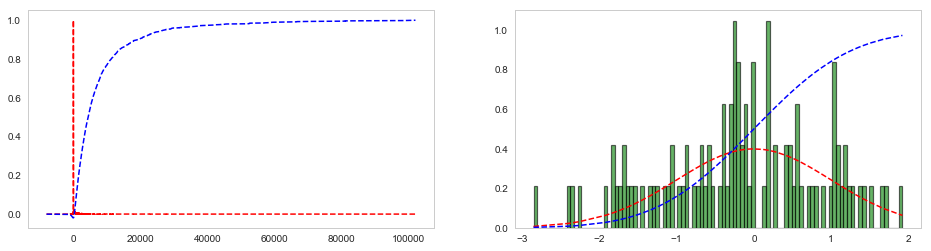

In [93]:
# distribuição de valores e distribuição normalizada do balanço médio anual

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

valores = list(basebank5.balance)
valores = np.sort(valores)

cum = np.cumsum(valores)
pmf = cum / np.amax(cum)                 # normaliza e cria o PMF

val, count = np.unique(valores, return_counts=True)
count = count / np.amax(count)

ax1.plot(val, count, 'r--', label='Frequencia')
ax1.plot(valores, pmf, 'b--', label='PMF')

# Valores normais
valores = norm.rvs(size=100)
valores = np.sort(valores)

ax2.plot(valores, norm.pdf(valores), 'r--', label='PDF')
ax2.plot(valores, norm.cdf(valores), 'b--', label='CDF')
ax2.hist(valores, bins=len(valores), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2)

plt.show()
plt.close()

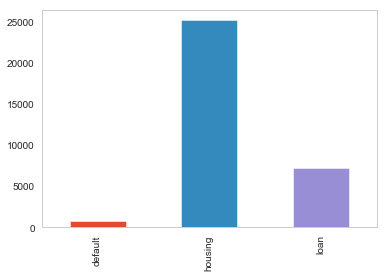

In [94]:
basebank[['default','housing','loan']].sum().plot(kind='bar')

In [95]:
print('Qual o fator determinante para que o banco exija um seguro de crédito?')
print('')

totalinad = basebank.default.sum()
percinad = (totalinad / basebank.shape[0])*100

totaleprestimos = basebank[((basebank.housing == 1) | (basebank.loan == 1))].age.count()
percemprestimos = (basebank[((basebank.housing == 1) | (basebank.loan == 1))].age.count() / basebank.shape[0])*100

print('Não há variável indicadora de nenhum tipo sobre seguro de crédito na base, sendo qualquer analise e sugestão sujeita a')
print('ampliação e validação pelas regras de negócio.\n')
print('A base mostra uma distribuição normalizada do balanco médio anual, sendo este um fator opcional a decisão (dependente de regras de negócio).\n')
print('Por prudência, recomenda-se a solicitação de um Seguro de Crédito para os casos de inadimplência conhecidos ({0:,} casos na base sendo {1:.1f}% representativos do total).'.format(totalinad,percinad))
print('Parece coerente a solicitação de um Seguro de Crédito para os casos que já possuem emprestimos de qualquer tipo, sendo este um volume total de {0:,}, representando {1:.1f}% da base.'.format(totaleprestimos,percemprestimos))

Qual o fator determinante para que o banco exija um seguro de crédito?

Não há variável indicadora de nenhum tipo sobre seguro de crédito na base, sendo qualquer analise e sugestão sujeita a
ampliação e validação pelas regras de negócio.

A base mostra uma distribuição normalizada do balanco médio anual coerente, sendo este um fator opcional a decisão (dependente de regras de negócio).

Por prudência, recomenda-se a solicitação de um Seguro de Crédito para os casos de inadimplência conhecidos (815 casos na base sendo 1.8% representativos do total).
Parece coerente a solicitação de um Seguro de Crédito para os casos que já possuem emprestimos de qualquer tipo, sendo este um volume total de 28,007, representando 61.9% da base.


### hipótese/pergunta 6
### Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

In [96]:
basebank6 = basebank[(basebank.housing == 1)]
basebank6

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,failure,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,failure,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,failure,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,failure,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,failure,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,failure,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,failure,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,failure,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,failure,0
10,41,admin.,divorced,secondary,0,270,1,0,unknown,5,may,222,1,-1,0,failure,0


In [97]:
basebank6.shape

(25130, 17)

In [98]:
basebank6.job.value_counts(1)

blue-collar     0.280
management      0.186
technician      0.164
admin.          0.127
services        0.110
entrepreneur    0.035
self-employed   0.030
unemployed      0.022
retired         0.020
housemaid       0.016
student         0.010
unknown         0.001
Name: job, dtype: float64

In [99]:
basebank6.marital.value_counts(1)

married    0.610
single     0.275
divorced   0.116
Name: marital, dtype: float64

In [100]:
basebank6.education.value_counts(1)

secondary   0.559
tertiary    0.254
primary     0.155
unknown     0.033
Name: education, dtype: float64

In [101]:
basebank6.contact.value_counts(1)

cellular    0.581
unknown     0.372
telephone   0.047
Name: contact, dtype: float64

In [102]:
basebank6.default.value_counts(1)

0   0.983
1   0.017
Name: default, dtype: float64

In [103]:
basebank6.loan.value_counts(1)

0   0.826
1   0.174
Name: loan, dtype: float64

In [104]:
basebank6.campaign.value_counts(1)

1    0.403
2    0.273
3    0.125
4    0.072
5    0.040
6    0.025
7    0.016
8    0.011
9    0.007
10   0.005
11   0.004
12   0.003
13   0.002
15   0.002
16   0.002
14   0.002
17   0.001
18   0.001
19   0.001
20   0.001
21   0.001
24   0.001
25   0.001
29   0.001
22   0.001
23   0.000
28   0.000
31   0.000
32   0.000
26   0.000
27   0.000
30   0.000
33   0.000
43   0.000
35   0.000
50   0.000
38   0.000
37   0.000
51   0.000
58   0.000
36   0.000
34   0.000
41   0.000
44   0.000
55   0.000
46   0.000
39   0.000
63   0.000
Name: campaign, dtype: float64

In [105]:
basebank6.y.value_counts(1)

0   0.923
1   0.077
Name: y, dtype: float64

In [106]:
basebank6.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,25130.000,25130,25130,25130,25130.000,25130.000,25130.000,25130.000,25130,25130.000,25130,25130.000,25130.000,25130.000,25130.000,25130,25130.000
unique,nan,12,3,4,nan,nan,nan,nan,3,nan,12,nan,nan,nan,nan,2,nan
top,nan,blue-collar,married,secondary,nan,nan,nan,nan,cellular,nan,may,nan,nan,nan,nan,failure,nan
freq,nan,7048,15321,14038,nan,nan,nan,nan,14603,nan,12076,nan,nan,nan,nan,24659,nan
mean,39.175,NaN,NaN,NaN,0.017,1175.103,1.000,0.174,NaN,15.598,NaN,259.331,2.698,51.312,0.657,NaN,0.077
std,8.927,NaN,NaN,NaN,0.130,2483.286,0.000,0.379,NaN,8.027,NaN,258.322,3.141,113.863,2.707,NaN,0.267
min,20.000,NaN,NaN,NaN,0.000,-4057.000,1.000,0.000,NaN,1.000,NaN,0.000,1.000,-1.000,0.000,NaN,0.000
25%,32.000,NaN,NaN,NaN,0.000,62.000,1.000,0.000,NaN,8.000,NaN,103.000,1.000,-1.000,0.000,NaN,0.000
50%,38.000,NaN,NaN,NaN,0.000,412.000,1.000,0.000,NaN,15.000,NaN,182.000,2.000,-1.000,0.000,NaN,0.000
75%,45.000,NaN,NaN,NaN,0.000,1257.750,1.000,0.000,NaN,21.000,NaN,318.000,3.000,-1.000,0.000,NaN,0.000


In [107]:
print('Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?')
print('')

totalb6 = int(basebank6.shape[0])
mediaidade = basebank6.age.mean()
estadocivil = str(basebank6.marital.value_counts().first_valid_index())
percestcivil = (basebank6.marital.value_counts()[0]/totalb6)*100
educacao = str(basebank6.education.value_counts().first_valid_index())
perceduca = (basebank6.education.value_counts()[0]/totalb6)*100
contato = str(basebank6.contact.value_counts().first_valid_index())
perccontato = (basebank6.contact.value_counts()[0]/totalb6)*100
inadimplentes = (basebank6.default.value_counts()[0]/totalb6)*100
emprestpessoal =  (basebank6.loan.value_counts()[0]/totalb6)*100
denylastcampaign = (basebank6.y.value_counts()[0]/totalb6)*100

print('Média de Idade: {0:.0f}'.format(mediaidade))
print('')
print('Cliente apresenta as seguites caracteristicas (por ordem de representatividade no grupo):\n')
print('Não inadimplentes: {0:.2f}% da base.'.format(inadimplentes))
print('Não aceitaram última campanha: {0:.2f}% da base.'.format(denylastcampaign))
print('Com empréstimo pessoal: {0:.2f}% da base.'.format(emprestpessoal))
print('Estado Civil: {0:}, sendo {1:.2f}% da base.'.format(estadocivil,percestcivil))
print('Meio de contato preferencial: {0:}, sendo {1:.2f}% da base.'.format(contato,perccontato))
print('Escolaridade: {0:}, sendo {1:.2f}% da base.'.format(educacao,perceduca))

Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

Média de Idade: 39

Cliente apresenta as seguites caracteristicas (por ordem de representatividade no grupo):

Não inadimplentes: 98.27% da base.
Não aceitaram última campanha: 92.30% da base.
Com empréstimo pessoal: 82.62% da base.
Estado Civil: married, sendo 60.97% da base.
Meio de contato preferencial: cellular, sendo 58.11% da base.
Escolaridade: secondary, sendo 55.86% da base.


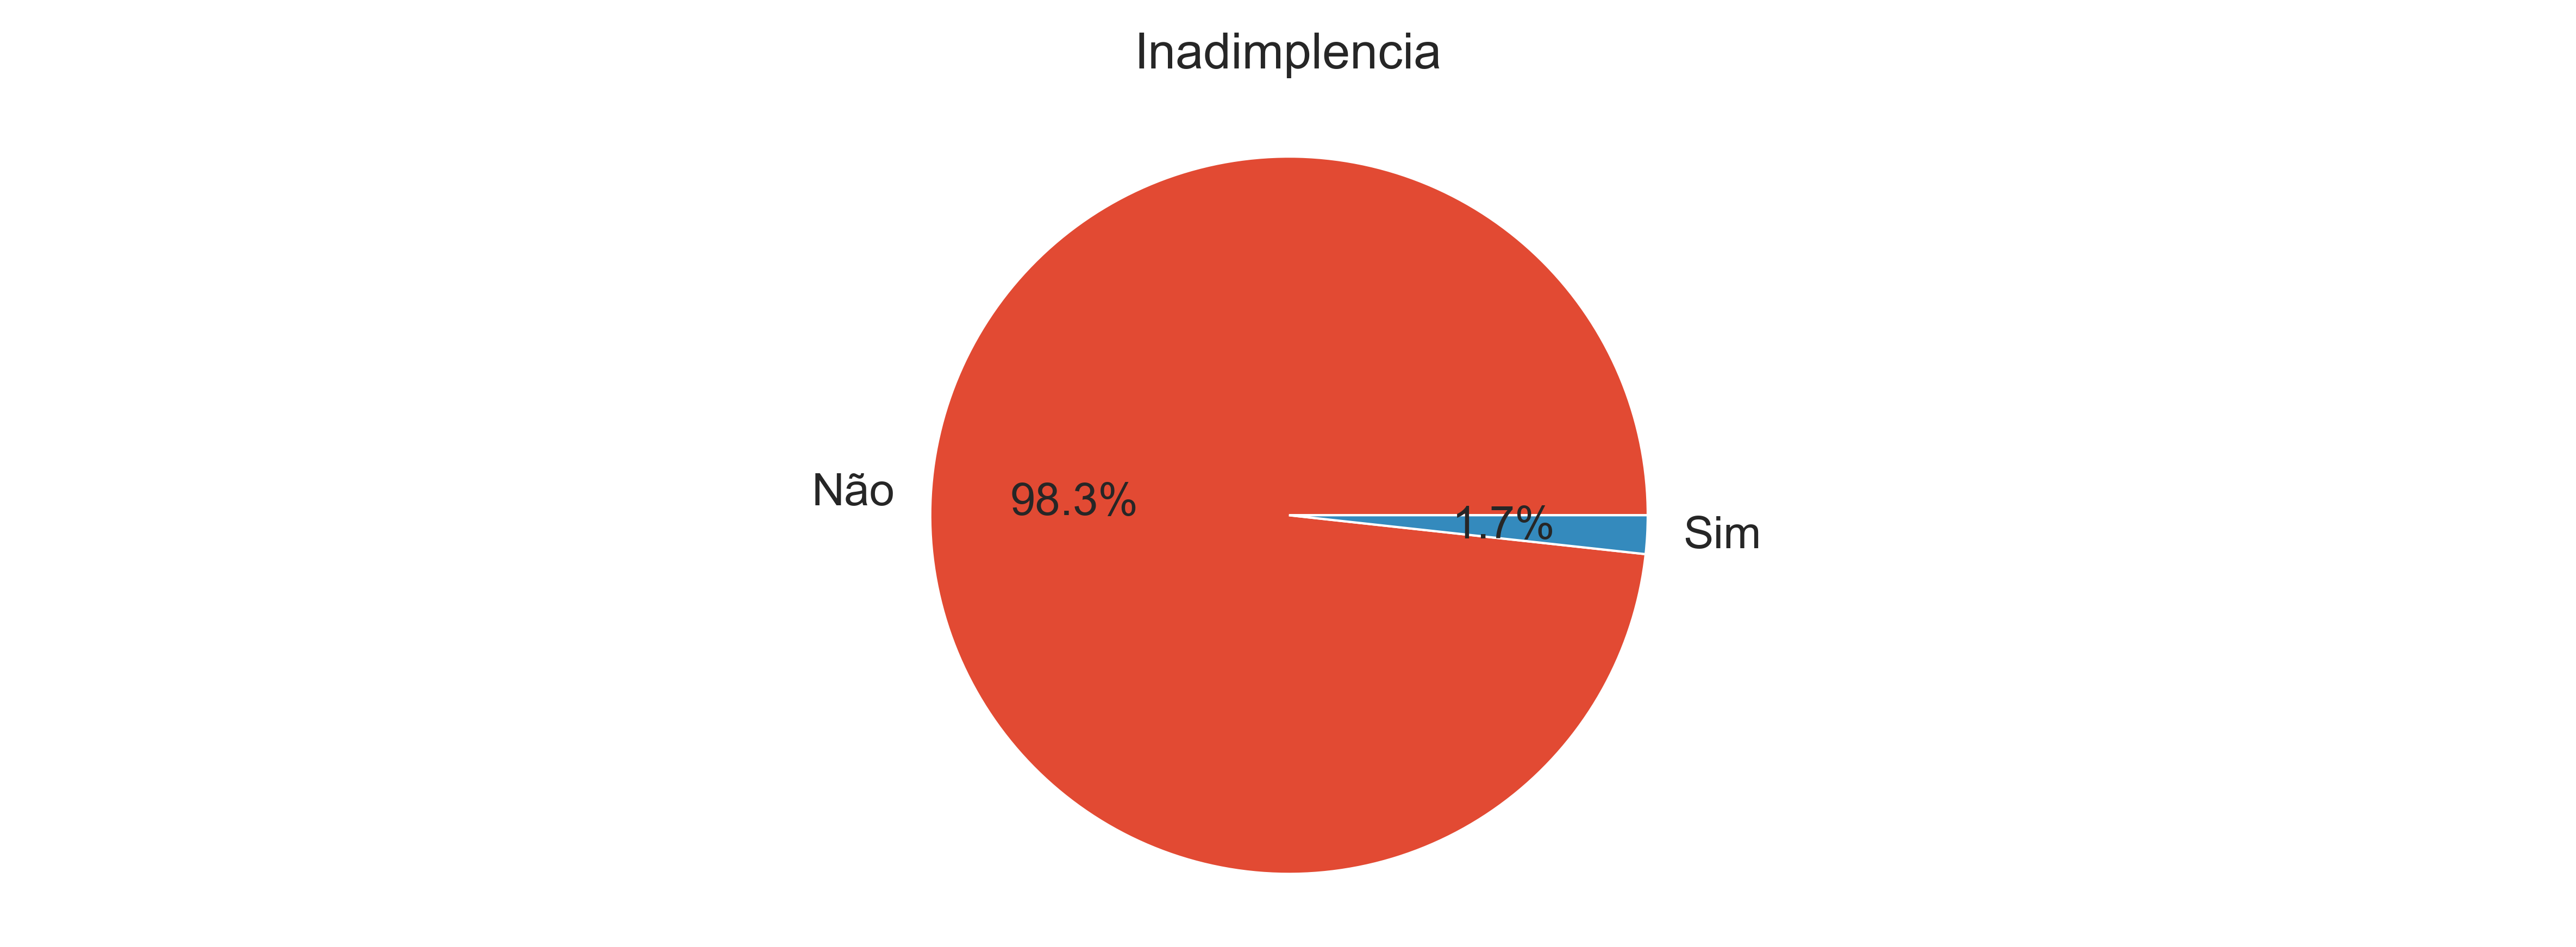

In [108]:
plt.figure(figsize=(8,3), dpi=600)
plt.pie(basebank6['default'].value_counts().sort_index(ascending=True)
        ,labels=['Não','Sim']
        ,autopct='%1.1f%%'
        ,shadow=False
       )
plt.title("Inadimplencia", fontsize=11, y=1.03)

plt.axis('equal')
plt.tight_layout()

plt.show()
plt.close()

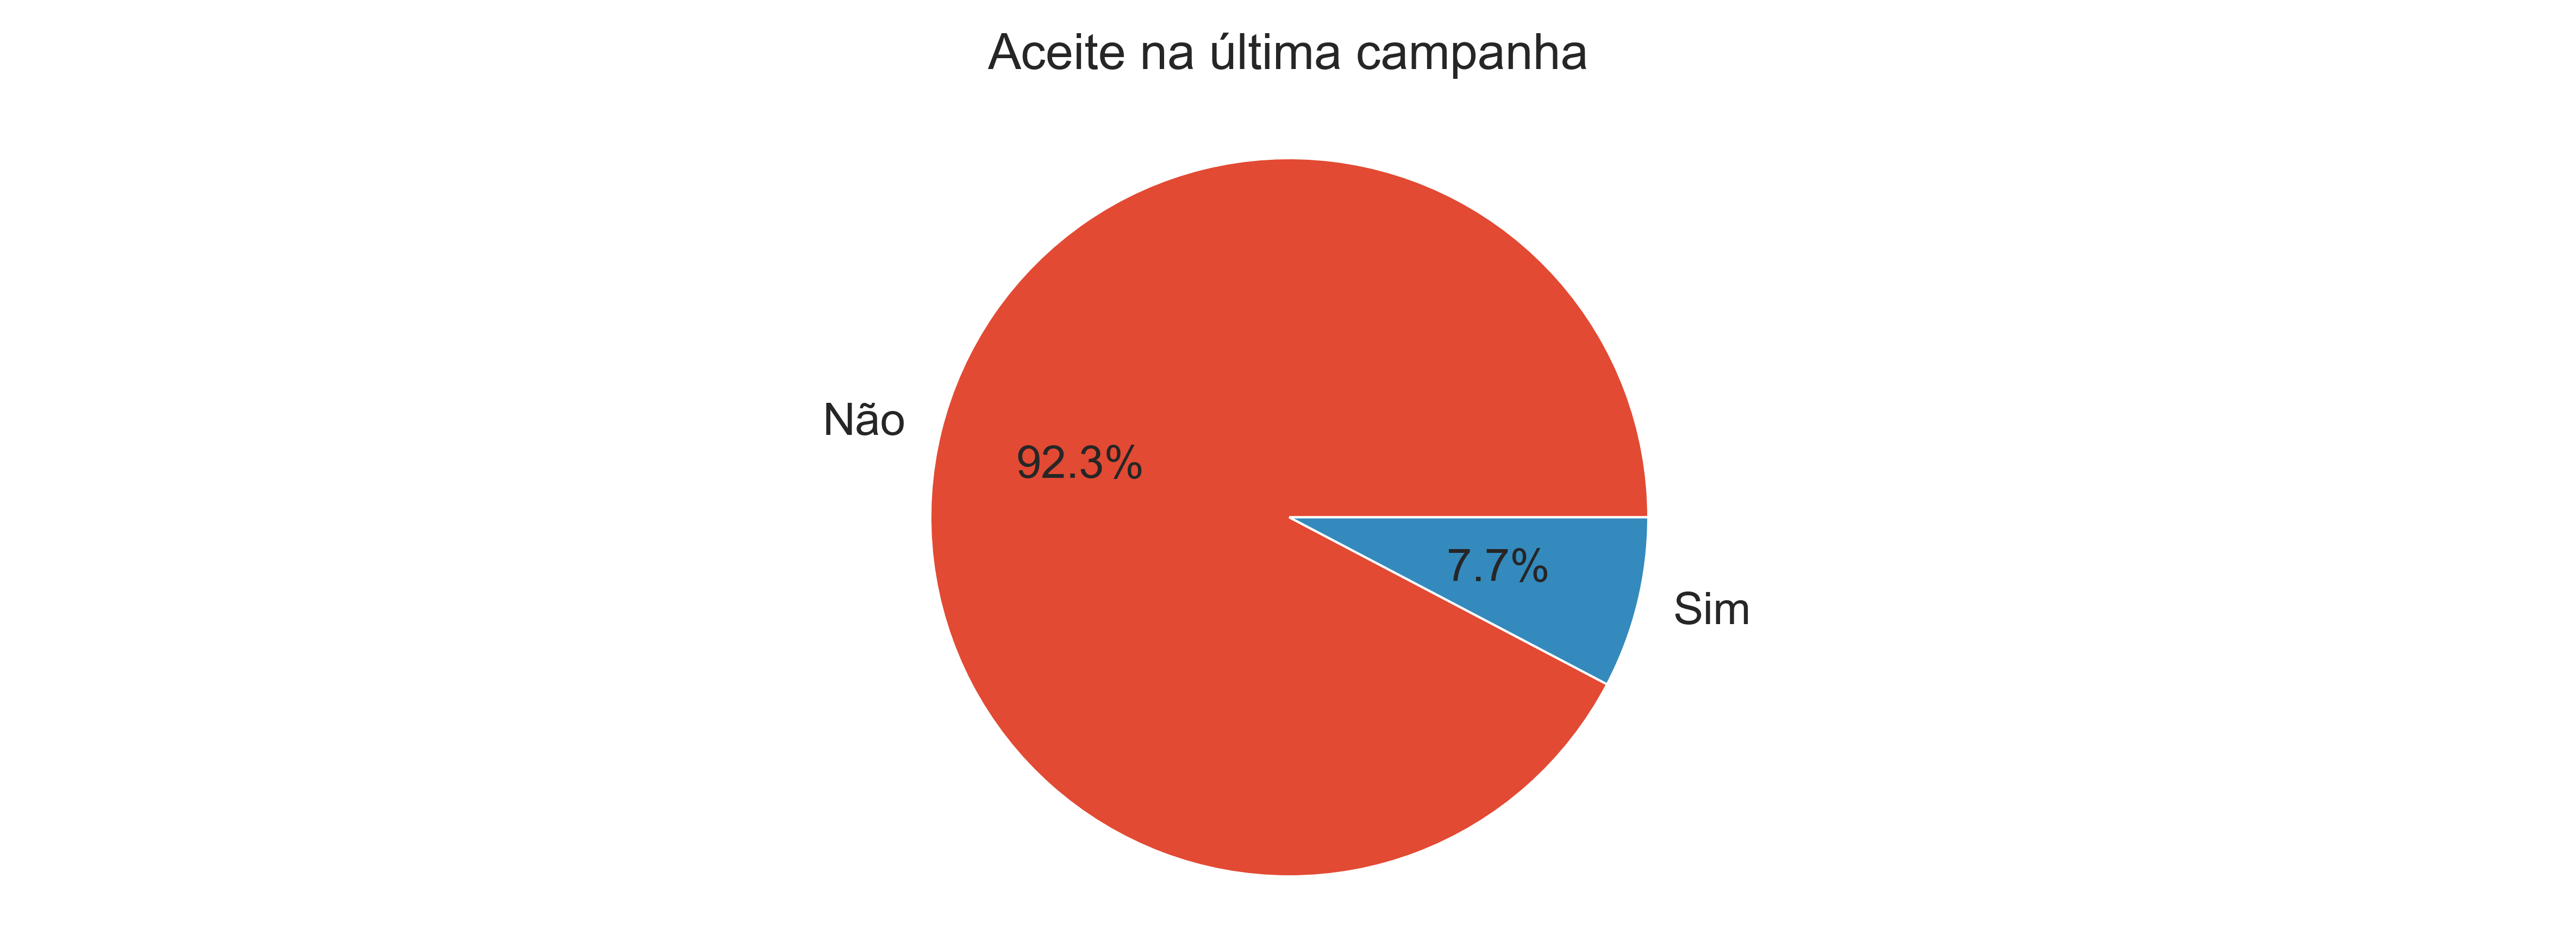

In [109]:
plt.figure(figsize=(8,3), dpi=600)
plt.pie(basebank6['y'].value_counts().sort_index(ascending=True)
        ,labels=['Não','Sim']
        ,autopct='%1.1f%%'
        ,shadow=False
       )
plt.title("Aceite na última campanha", fontsize=11, y=1.03)

plt.axis('equal')
plt.tight_layout()

plt.show()
plt.close()

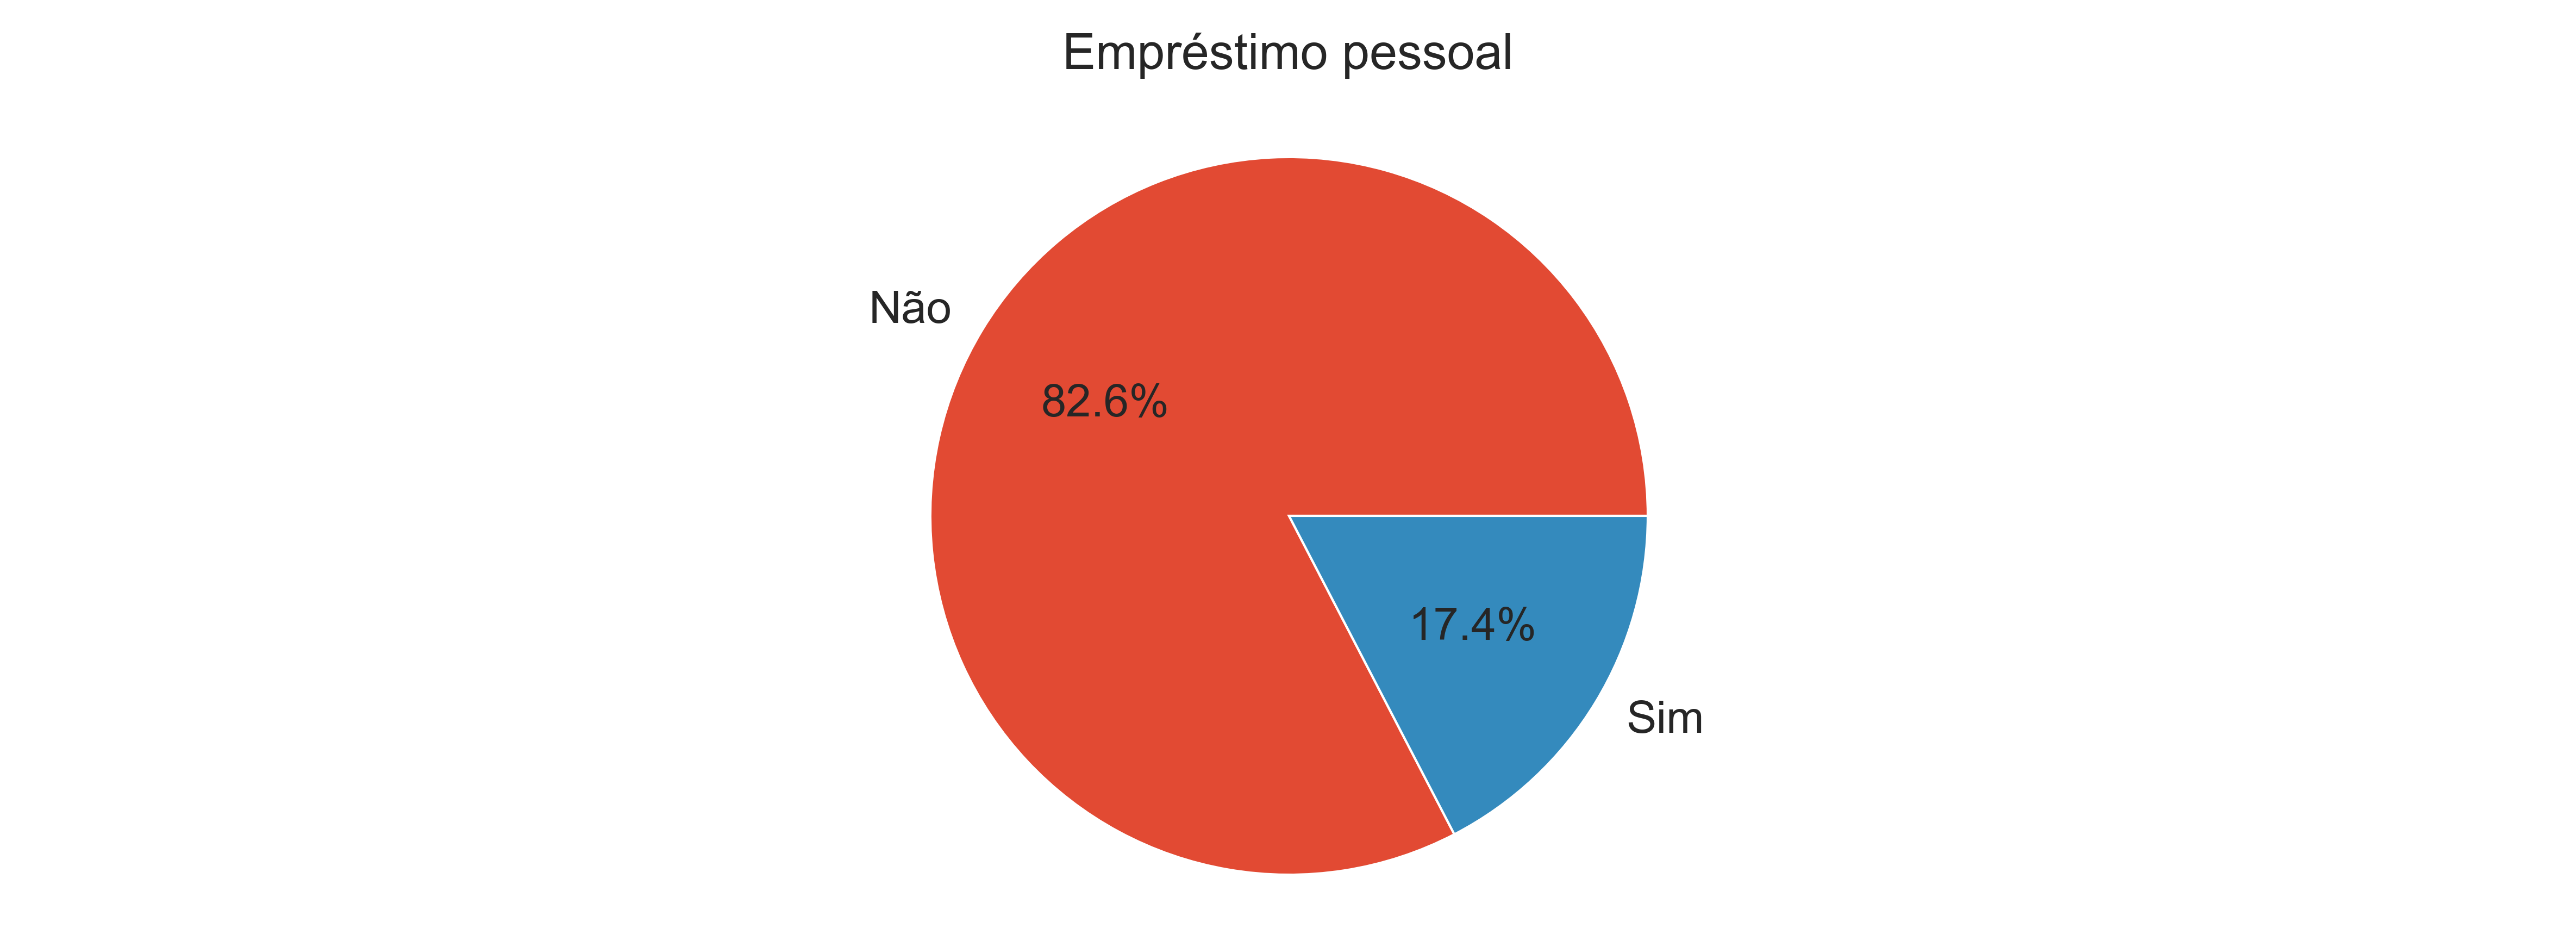

In [110]:
plt.figure(figsize=(8,3), dpi=600)
plt.pie(basebank6['loan'].value_counts().sort_index(ascending=True)
        ,labels=['Não','Sim']
        ,autopct='%1.1f%%'
        ,shadow=False
       )
plt.title("Empréstimo pessoal", fontsize=11, y=1.03)

plt.axis('equal')
plt.tight_layout()

plt.show()
plt.close()

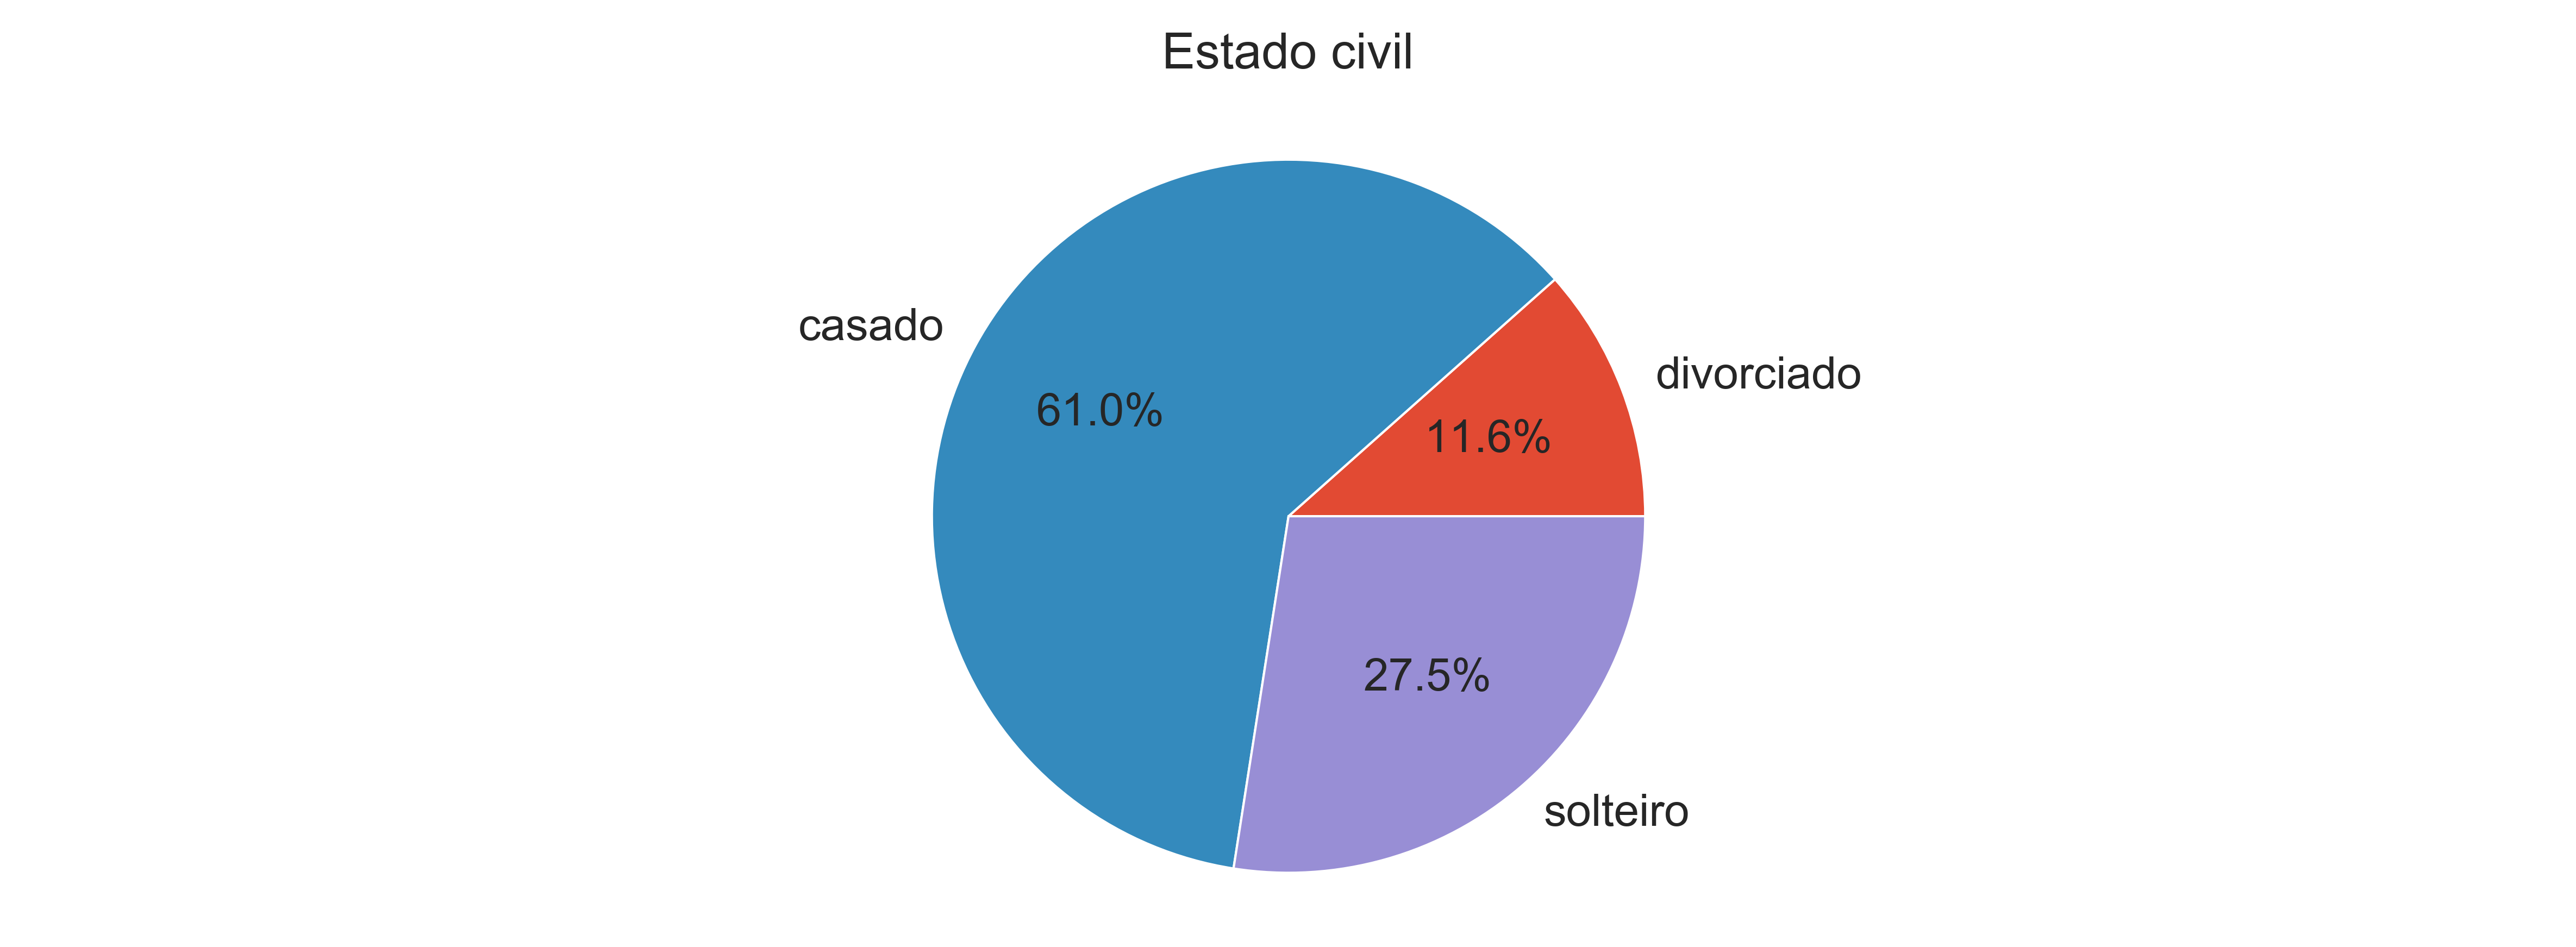

In [111]:
plt.figure(figsize=(8,3), dpi=600)
plt.pie(basebank6['marital'].value_counts().sort_index(ascending=True)
        ,labels=['divorciado','casado','solteiro']
        ,autopct='%1.1f%%'
        ,shadow=False
       )
plt.title("Estado civil", fontsize=11, y=1.03)

plt.axis('equal')
plt.tight_layout()

plt.show()
plt.close()

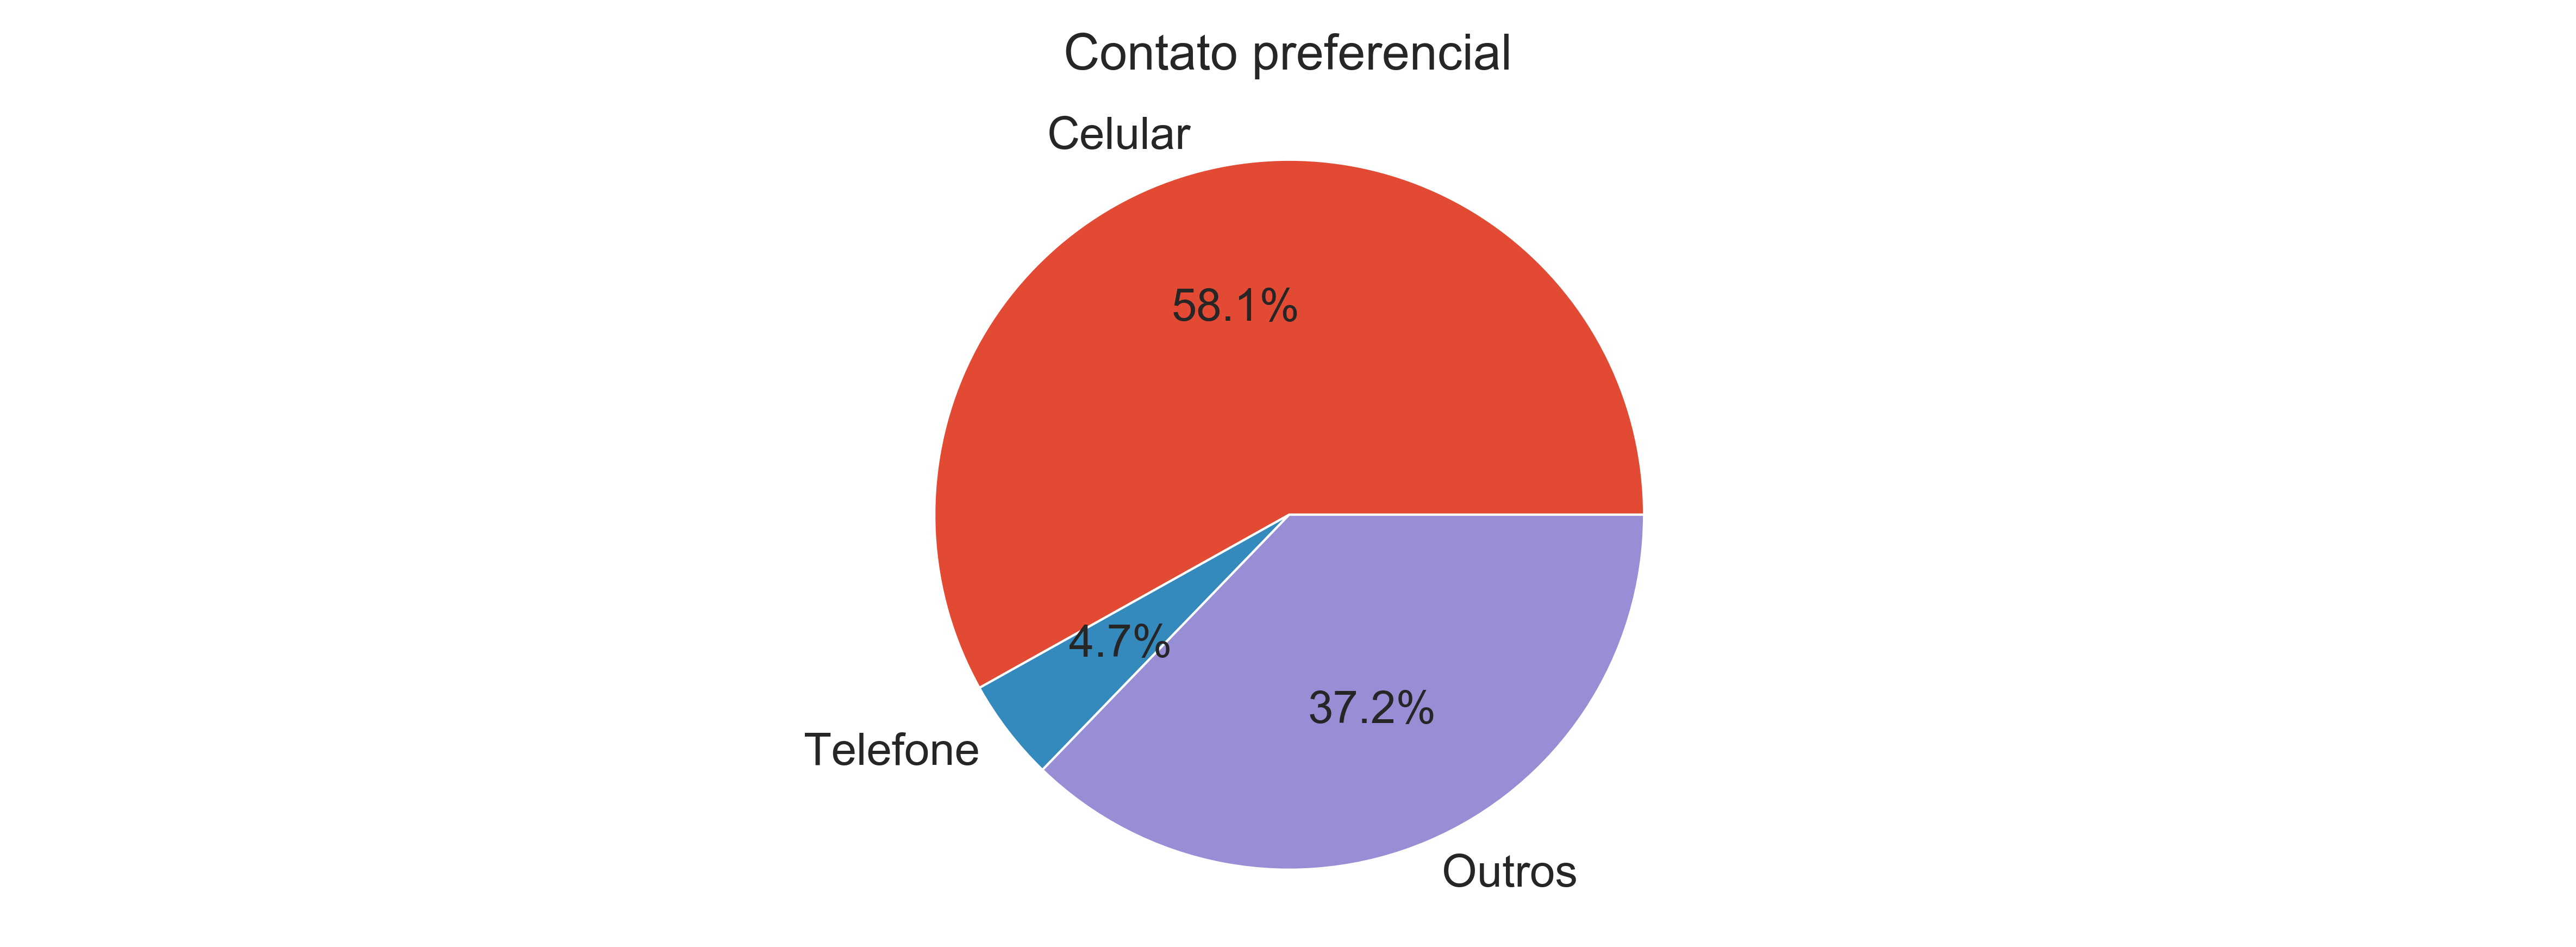

In [112]:
plt.figure(figsize=(8,3), dpi=600)
plt.pie(basebank6['contact'].value_counts().sort_index(ascending=True)
        ,labels=['Celular','Telefone','Outros']
        ,autopct='%1.1f%%'
        ,shadow=False
       )
plt.title("Contato preferencial", fontsize=11, y=1.03)

plt.axis('equal')
plt.tight_layout()

plt.show()
plt.close()

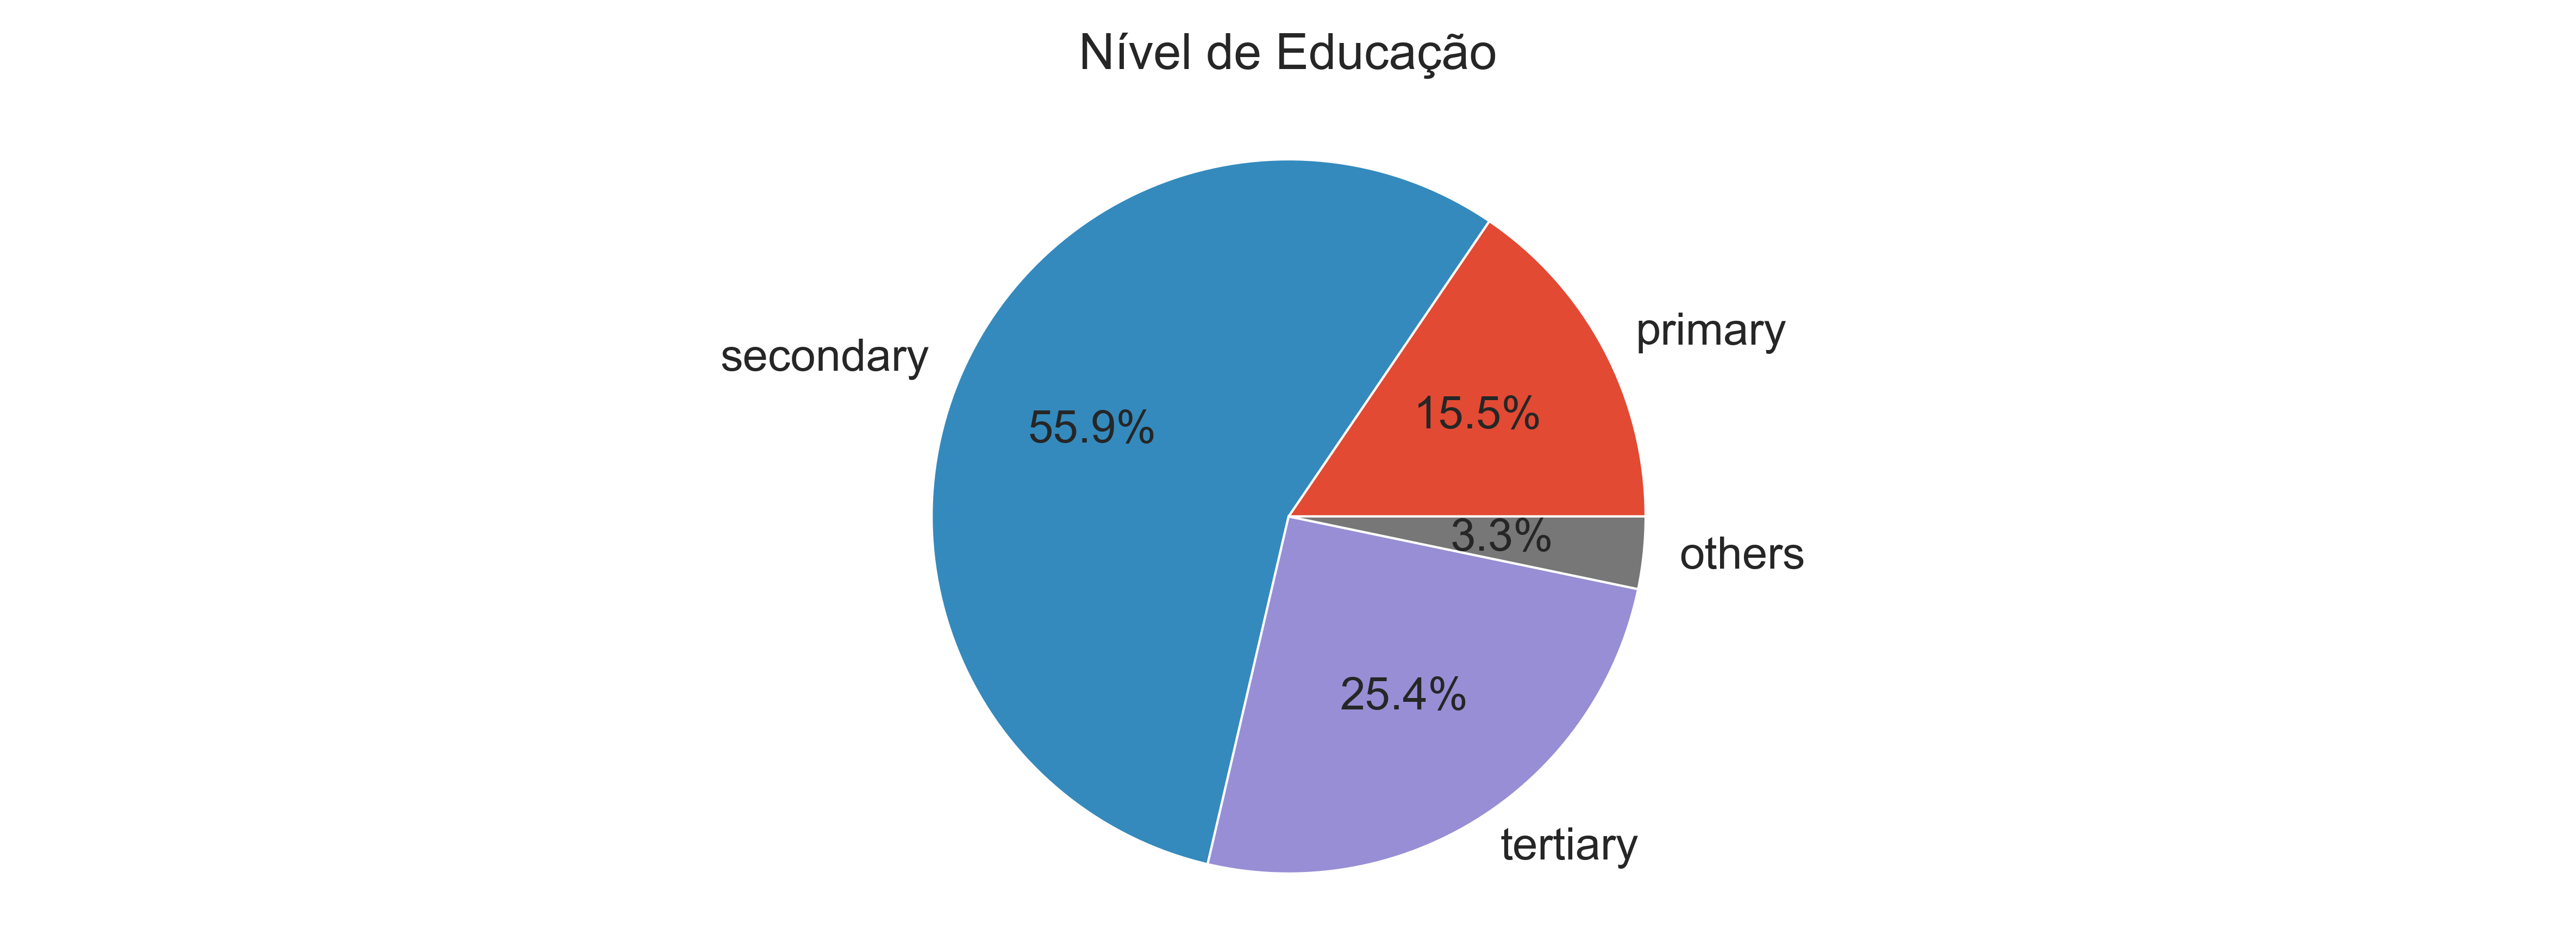

In [113]:
plt.figure(figsize=(8,3), dpi=600)
plt.pie(basebank6['education'].value_counts().sort_index(ascending=True)
        ,labels=['primary','secondary','tertiary','others']
        ,autopct='%1.1f%%'
        ,shadow=False
       )
plt.title("Nível de Educação", fontsize=11, y=1.03)

plt.axis('equal')
plt.tight_layout()

plt.show()
plt.close()